In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

# merging two csv files
df_delay = pd.concat(
    map(pd.read_csv, ["../BITS PILANI FINAL PROJECT/2007.csv", "../BITS PILANI FINAL PROJECT/2008.csv"]), ignore_index=True)

# See Sample data
df_delay.head()

# column details of the data set for an insight into the data
df_delay.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14462943 entries, 0 to 14462942
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay    

In [2]:
print (df_delay.count)

<bound method DataFrame.count of           Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0         2007      1           1          1   1232.0        1225   1341.0   
1         2007      1           1          1   1918.0        1905   2043.0   
2         2007      1           1          1   2206.0        2130   2334.0   
3         2007      1           1          1   1230.0        1200   1356.0   
4         2007      1           1          1    831.0         830    957.0   
...        ...    ...         ...        ...      ...         ...      ...   
14462938  2008     12          13          6   1002.0         959   1204.0   
14462939  2008     12          13          6    834.0         835   1021.0   
14462940  2008     12          13          6    655.0         700    856.0   
14462941  2008     12          13          6   1251.0        1240   1446.0   
14462942  2008     12          13          6   1110.0        1103   1413.0   

          CRSArrTime UniqueCar

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'DayofMonth'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'DepTime'}>],
       [<AxesSubplot:title={'center':'CRSDepTime'}>,
        <AxesSubplot:title={'center':'ArrTime'}>,
        <AxesSubplot:title={'center':'CRSArrTime'}>,
        <AxesSubplot:title={'center':'FlightNum'}>,
        <AxesSubplot:title={'center':'ActualElapsedTime'}>],
       [<AxesSubplot:title={'center':'CRSElapsedTime'}>,
        <AxesSubplot:title={'center':'AirTime'}>,
        <AxesSubplot:title={'center':'ArrDelay'}>,
        <AxesSubplot:title={'center':'DepDelay'}>,
        <AxesSubplot:title={'center':'Distance'}>],
       [<AxesSubplot:title={'center':'TaxiIn'}>,
        <AxesSubplot:title={'center':'TaxiOut'}>,
        <AxesSubplot:title={'center':'Cancelled'}>,
        <AxesSubplot:title={'center':'Diverted'}>,
        <AxesSubp

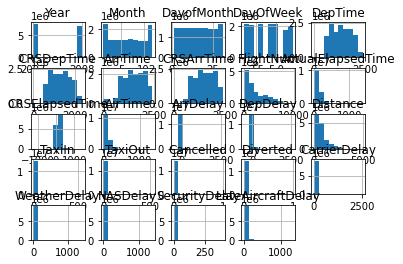

In [37]:
df_delay.hist()

In [38]:
missing_df = df_delay.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df_delay.shape[0]-missing_df['missing values'])/df_delay.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)


,variable,missing values,filling factor (%)
0,CancellationCode,14164760,2.061703
1,LateAircraftDelay,5484993,62.075540
2,NASDelay,5484993,62.075540
3,WeatherDelay,5484993,62.075540
4,CarrierDelay,5484993,62.075540
5,SecurityDelay,5484993,62.075540
6,AirTime,332626,97.700150
7,ActualElapsedTime,332626,97.700150
8,ArrDelay,332626,97.700150
9,ArrTime,329576,97.721238


In [39]:
# replacing na values 
df_delay["LateAircraftDelay"].fillna(0, inplace = True)
df_delay["SecurityDelay"].fillna(0, inplace = True)
df_delay["NASDelay"].fillna(0, inplace = True)
df_delay["WeatherDelay"].fillna(0, inplace = True)
df_delay["CarrierDelay"].fillna(0, inplace = True)

In [40]:
#New Depart_Date column created with year, month and day
#check the looping or check how status is updated

df_delay['Depart_Date'] = pd.to_datetime(df_delay.Year*10000+df_delay.Month*100+df_delay.DayofMonth,format='%Y%m%d')

#Status represents if the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in df_delay:
    df_delay.loc[df_delay['ArrDelay'] <= 15, 'Status'] = 0
    df_delay.loc[df_delay['ArrDelay'] >= 15, 'Status'] = 1
    df_delay.loc[df_delay['ArrDelay'] >= 60, 'Status'] = 2
    df_delay.loc[df_delay['Diverted'] == 1, 'Status'] = 3
    df_delay.loc[df_delay['Cancelled'] == 1, 'Status'] = 4



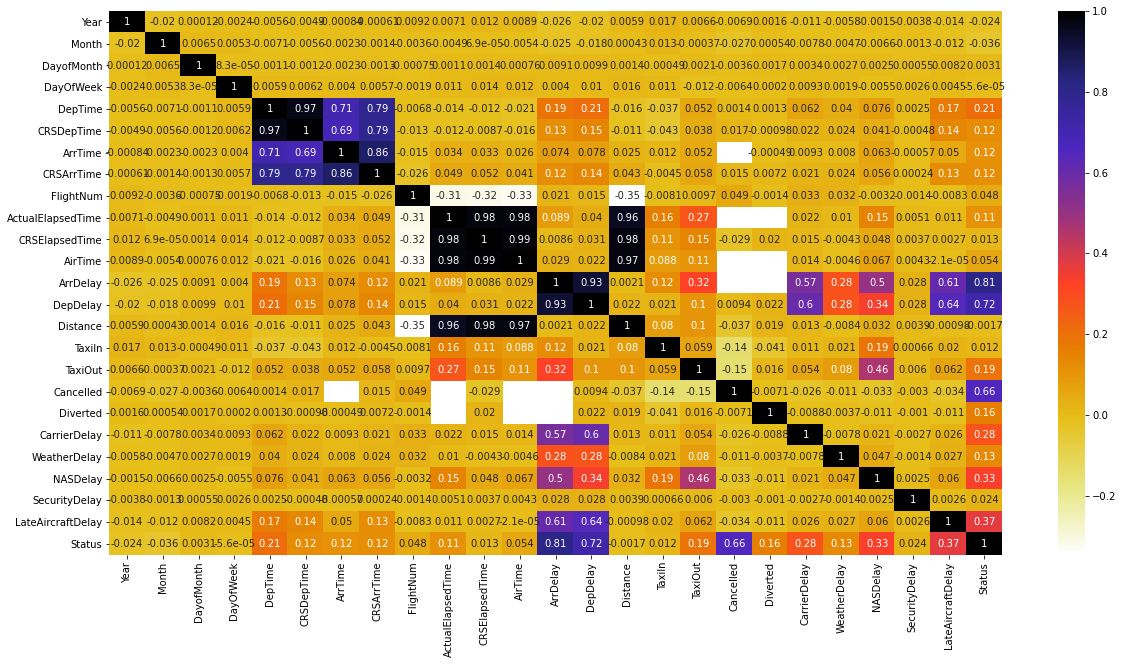

In [41]:
#correlation matrix
corrmat = df_delay.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, annot=True, cmap=plt.cm.CMRmap_r);
plt.show()

In [42]:
    
variables_to_remove = ['Year','Month','DayofMonth','CRSArrTime','CRSElapsedTime','CRSDepTime','ArrTime','DepDelay','FlightNum','TailNum']
df_delay.drop(variables_to_remove, axis = 1, inplace = True)

In [43]:
#variables_to_remove = ['CancellationCode']
#df_delay.drop(variables_to_remove, axis = 1, inplace = True)

In [44]:
missing_df = df_delay.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df_delay.shape[0]-missing_df['missing values'])/df_delay.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,CancellationCode,14164760,2.061703
1,ActualElapsedTime,332626,97.700150
2,AirTime,332626,97.700150
3,ArrDelay,332626,97.700150
4,DepTime,296994,97.946518
5,TaxiIn,151649,98.951465
6,TaxiOut,137058,99.052351
7,LateAircraftDelay,0,100.000000
8,SecurityDelay,0,100.000000
9,NASDelay,0,100.000000


In [45]:
# replacing na values in college with No college
df_delay["LateAircraftDelay"].fillna(0, inplace = True)
df_delay["SecurityDelay"].fillna(0, inplace = True)
df_delay["NASDelay"].fillna(0, inplace = True)
df_delay["WeatherDelay"].fillna(0, inplace = True)
df_delay["CarrierDelay"].fillna(0, inplace = True)

In [46]:
missing_df = df_delay.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df_delay.shape[0]-missing_df['missing values'])/df_delay.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,CancellationCode,14164760,2.061703
1,ActualElapsedTime,332626,97.700150
2,AirTime,332626,97.700150
3,ArrDelay,332626,97.700150
4,DepTime,296994,97.946518
5,TaxiIn,151649,98.951465
6,TaxiOut,137058,99.052351
7,LateAircraftDelay,0,100.000000
8,SecurityDelay,0,100.000000
9,NASDelay,0,100.000000


In [47]:
df_delay['DayOfWeek'].head

<bound method NDFrame.head of 0           1
1           1
2           1
3           1
4           1
           ..
14462938    6
14462939    6
14462940    6
14462941    6
14462942    6
Name: DayOfWeek, Length: 14462943, dtype: int64>

# Exploratory Data Analysis

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


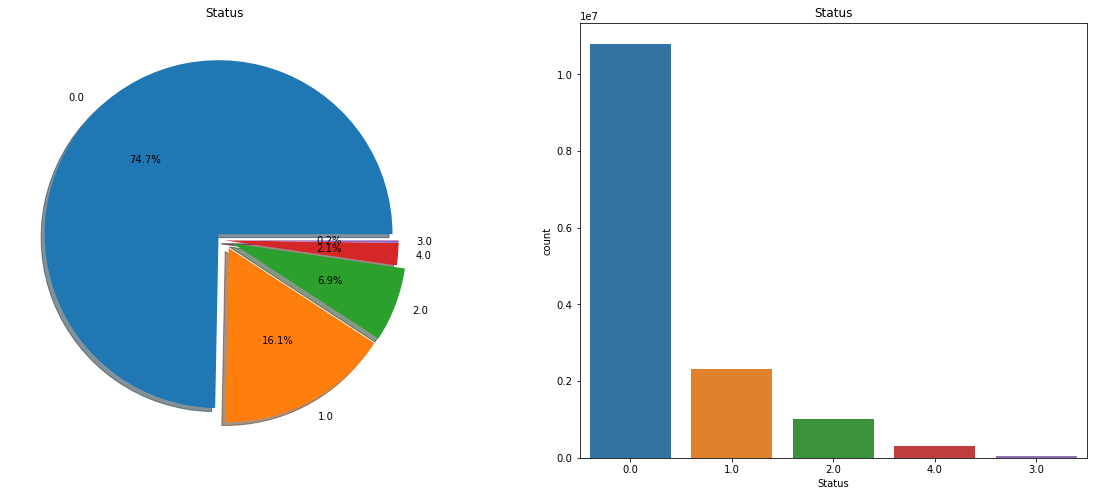

Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)


In [48]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df_delay['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = df_delay['Status'].value_counts().index, data=df_delay,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')

# Cancelled Flights

In [49]:
df_delay["CancellationCode"].fillna(0, inplace = True)

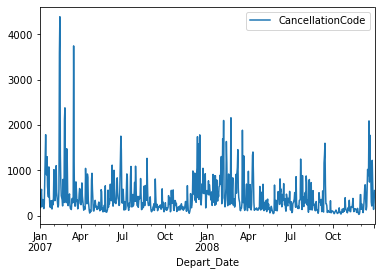

In [50]:
flights=df_delay
CancFlights = flights[(flights.Status == 4)]

CancFlights[['Depart_Date','CancellationCode']].groupby(['Depart_Date']).count().plot()
plt.show()

# Delayed Flights

In [51]:
Delayedflights = flights[(flights.Status >= 1) &(flights.Status < 3)]

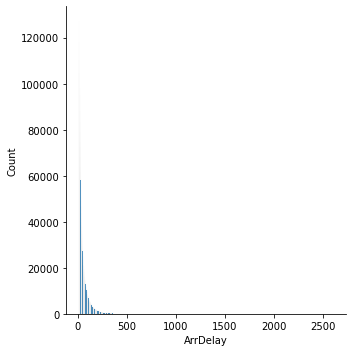

In [52]:
#histogram
sns.displot(Delayedflights['ArrDelay'])
plt.show()

In [53]:
print(flights['UniqueCarrier'].value_counts())

WN    2370625
AA    1238742
OO    1165041
MQ    1031187
UA     939517
US     939036
DL     927820
XE     809283
NW     762178
CO     621606
EV     566809
YV     549292
FL     524843
9E     521059
OH     431394
B6     387541
AS     311287
F9     193522
HA     118001
AQ      54160
Name: UniqueCarrier, dtype: int64


<ipython-input-54-07cfaa26a140>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df2.groupby('DayOfWeek')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()


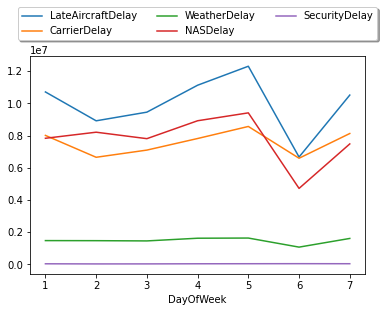

In [54]:
df2 = Delayedflights.filter(['DayOfWeek','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
df2 = df2.groupby('DayOfWeek')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()

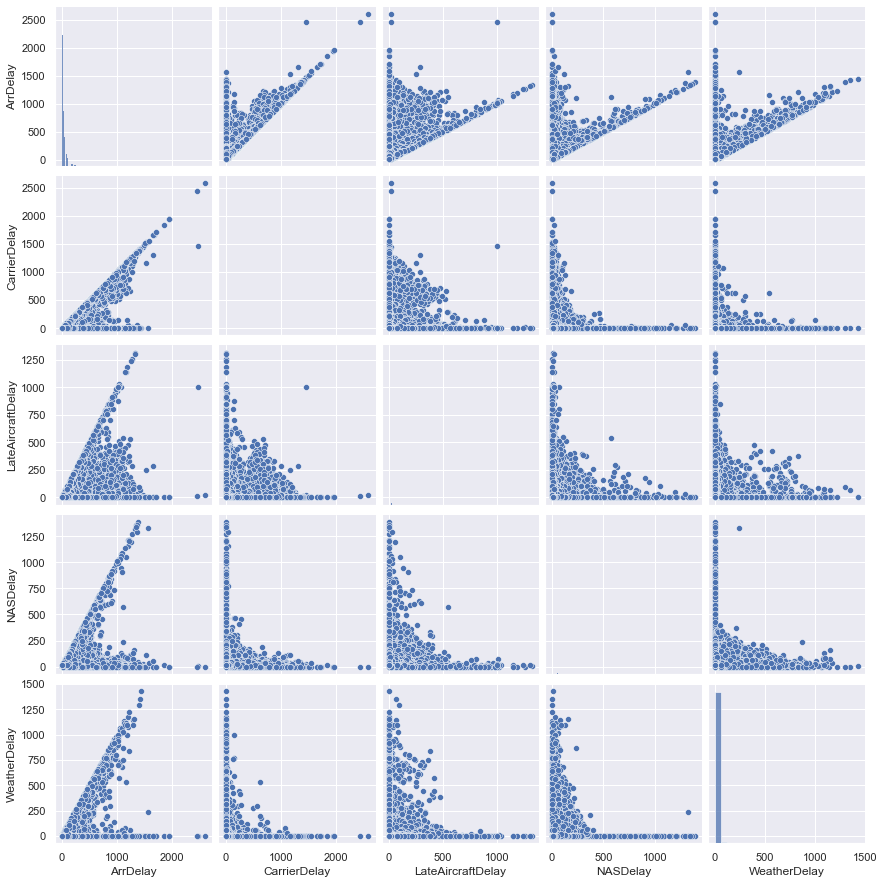

In [58]:
#scatterplot
sns.set()
cols = ['ArrDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay']
sns.pairplot(Delayedflights[cols], height = 2.5)
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


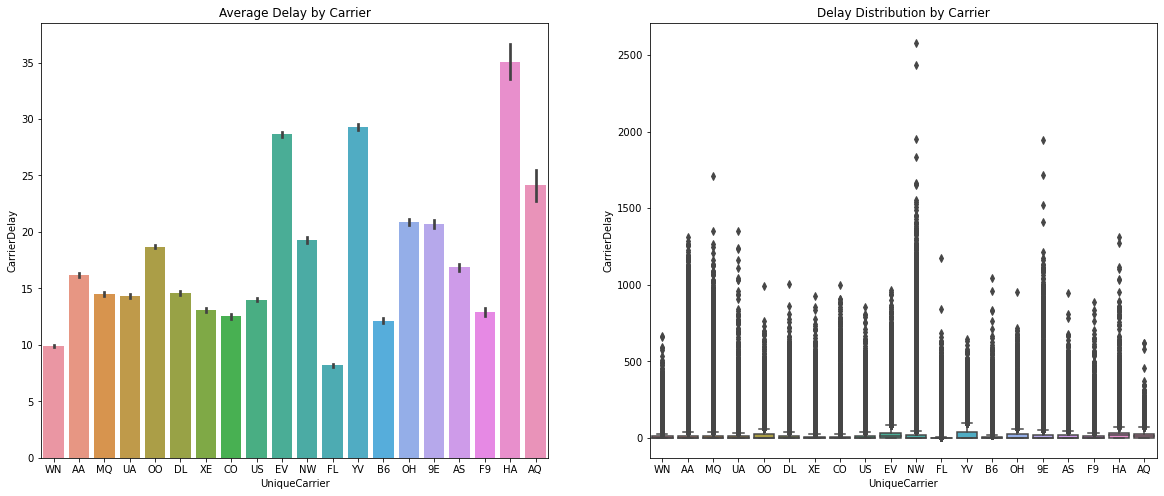

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [55]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('UniqueCarrier','CarrierDelay', data=Delayedflights,ax=ax[0], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[0].set_title('Average Delay by Carrier')
sns.boxplot('UniqueCarrier','CarrierDelay', data=Delayedflights,ax=ax[1], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[1].set_title('Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines','US: US Airways',
       'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])